# Py

## My fave DAG

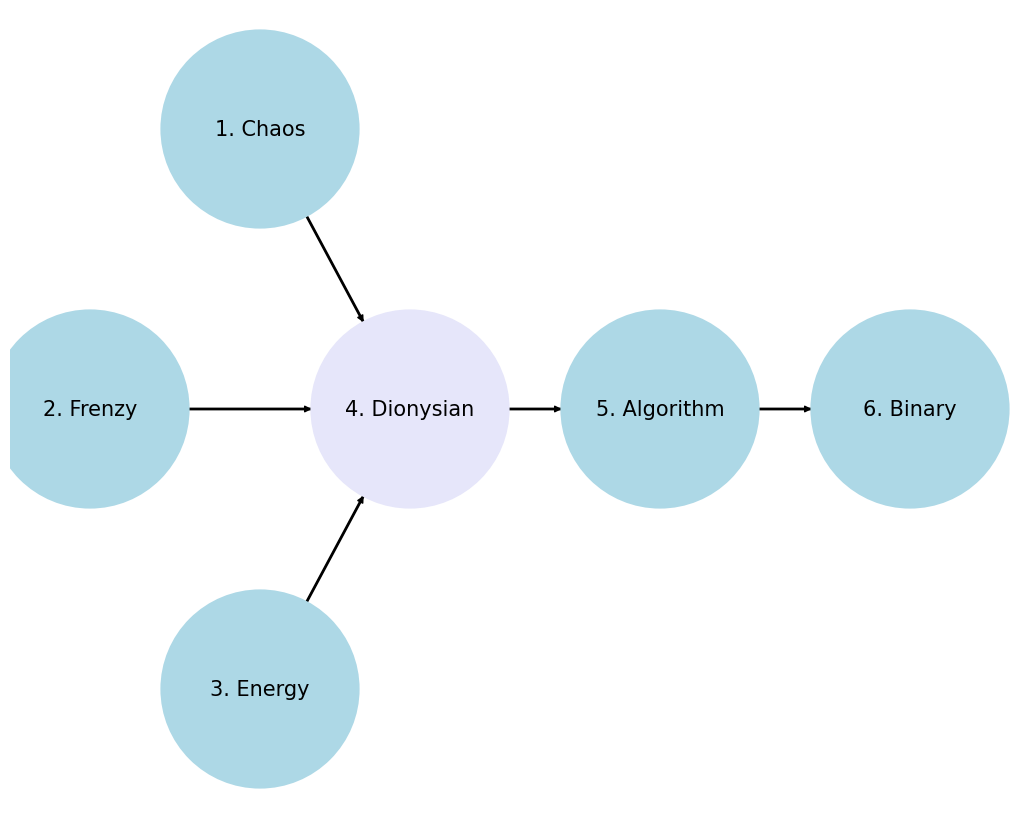

In [1]:
import os  # Add this import statement
import networkx as nx
import matplotlib.pyplot as plt
import warnings

G = nx.DiGraph()
G.add_node("1. Root", pos=(-2500, 700))
G.add_node("2. Pentatonic", pos=(-4200, 0))
G.add_node("3. Diatonic", pos=(-2500, -700))
G.add_node("4. Chromatic", pos=(-1000, 0))
G.add_node("5. Temperament", pos=(1500, 0))
G.add_node("6. Expression", pos=(4000, 0))

G.add_edges_from([("1. Root", "4. Chromatic")])
G.add_edges_from([("2. Pentatonic", "4. Chromatic")])
G.add_edges_from([("3. Diatonic", "4. Chromatic")])
G.add_edges_from([("4. Chromatic", "5. Temperament")])
G.add_edges_from([("5. Temperament", "6. Expression")])

pos = nx.get_node_attributes(G, 'pos')
labels = {"4. Chromatic": "4. Dionysian",
          "1. Root": "1. Chaos",
          "2. Pentatonic": "2. Frenzy",
          "3. Diatonic": "3. Energy",
          "5. Temperament": "5. Algorithm",
          "6. Expression": "6. Binary"}

# Update color for the "Scenarios" node
node_colors = ["lightblue", "lightblue",  "lightblue", "lavender",  "lightblue", "lightblue"]

# Suppress the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=20000, node_color=node_colors, linewidths=2, edge_color='black', style='solid')
nx.draw_networkx_labels(G, pos, labels, font_size=15)
nx.draw_networkx_edges(G, pos, edge_color='black', style='solid', width=2)
plt.xlim(-5000, 5000)
plt.ylim(-1000, 1000)
plt.axis("off")

# Specify the directory where the file should be saved
output_dir = os.path.expanduser("~/documents/liveserver/new")  # Expand the user directory

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the plot as a PNG file in the specified directory
plt.savefig(os.path.join(output_dir, "self-criticism.png"))
plt.show()


                     1. Pessimism
                                 \
        2. Beyond Good & Evil -> 4. Dionysian -> 5. Science -> 6. Morality
                                 /
                                 3. Robustness

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV files
s0_df = pd.read_csv('../s0_nondonor.csv', header=0)

# Define the survival function S(t)
def survival_function(t):
    return s0_df['s0_nondonor'][t]

# Define the hazard function h(t)
def hazard_function(t):
    return hr * survival_function(t)

# Define the time array
time = np.arange(0, len(s0_df))

# Calculate the failure function
failure_function = 1 - survival_function(time)

# Plot the failure curve
plt.plot(time, failure_function)
plt.xlabel('Time')
plt.ylabel('Probability of Failure')
plt.title('Failure Curve')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../s0_nondonor.csv'

In [36]:
print(s0_df)

       _st  _d         _t  _t0  s0_nondonor
0        1   1  14.748802    0     0.788091
1        1   0  29.927446    0     0.576725
2        1   0  29.746748    0     0.578996
3        1   0  19.203285    0     0.725669
4        1   0  20.213552    0     0.711040
...    ...  ..        ...  ...          ...
73563    1   0   2.214921    0     0.974868
73564    1   0   1.516769    0     0.983511
73565    1   0   1.415469    0     0.984641
73566    1   0   1.960301    0     0.978229
73567    1   0   1.100616    0     0.988551

[73568 rows x 5 columns]


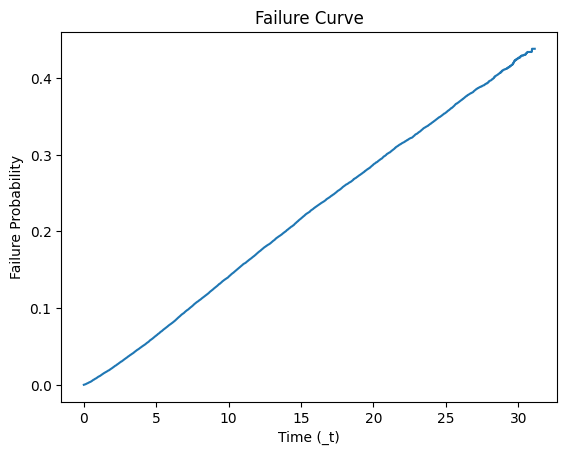

In [45]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the data from the CSV file
s0_df = pd.read_csv('../s0_nondonor.csv', header=0)

# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimate to the data
kmf.fit(s0_df['_t'], event_observed=s0_df['_d'])

# Get the survival probabilities
survival_probabilities = kmf.survival_function_

# Calculate the failure probabilities (1 - survival probability)
failure_probabilities = 1 - survival_probabilities

# Plot the failure curve
plt.plot(kmf.timeline, failure_probabilities)
plt.xlabel('Time (_t)')
plt.ylabel('Failure Probability')
plt.title('Failure Curve')
plt.show()

In [1]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return option_price

# Example usage
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to maturity in years
r = 0.05 # Risk-free rate
sigma = 0.2  # Volatility

call_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print(f"Call Option Price: {call_price}")
print(f"Put Option Price: {put_price}")


Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971


Sure, let's dive into the derivation of the Black-Scholes formula, critique it, and then consider the implications of chaos, machine learning, and high-frequency trading, particularly in the context of Jim Simons' success.

### Part 1: Derivation of the Black-Scholes Formula

#### 1. **Setting up the Problem**

Consider a European call option on a non-dividend-paying stock. The key variables are:
- $ S $: Current stock price
- $ K $: Strike price of the option
- $ T $: Time to maturity of the option
- $ r $: Risk-free interest rate
- $ \sigma $: Volatility of the stock
- $ N(x) $: Cumulative distribution function of the standard normal distribution

#### 2. **Assumptions**
- The stock price follows a geometric Brownian motion:
  $$
  dS = \mu S dt + \sigma S dW
  $$
  where $ \mu $ is the drift rate, $ \sigma $ is the volatility, and $ W $ is a Wiener process.

- No arbitrage opportunities exist.
- Trading is continuous, and there are no transaction costs or taxes.

#### 3. **Deriving the Black-Scholes Partial Differential Equation**

Using Ito's Lemma for a function $ V(S,t) $, the price of the option:

$$
dV = \frac{\partial V}{\partial t} dt + \frac{\partial V}{\partial S} dS + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} dS^2
$$

Substituting $ dS $ and $ dS^2 = \sigma^2 S^2 dt $:

$$
dV = \frac{\partial V}{\partial t} dt + \frac{\partial V}{\partial S} (\mu S dt + \sigma S dW) + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} \sigma^2 S^2 dt
$$

$$
dV = \left(\frac{\partial V}{\partial t} + \mu S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}\right) dt + \sigma S \frac{\partial V}{\partial S} dW
$$

To eliminate the risk from the stochastic term ($dW$), construct a portfolio $ \Pi $ consisting of one option and $-\frac{\partial V}{\partial S}$ shares of stock:

$$
\Pi = V - \frac{\partial V}{\partial S} S
$$

$$
d\Pi = dV - \frac{\partial V}{\partial S} dS
$$

Substitute $dV$ and $dS$:

$$
d\Pi = \left(\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}\right) dt
$$

Since the portfolio is risk-free, it must grow at the risk-free rate $r$:

$$
d\Pi = r \Pi dt
$$

$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} = r \left(V - S \frac{\partial V}{\partial S}\right)
$$

Rearranging:

$$
\frac{\partial V}{\partial t} + rS \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} - rV = 0
$$

This is the Black-Scholes partial differential equation.

#### 4. **Solving the PDE**

For a European call option, the terminal condition at $ t = T $ is:

$$
V(S, T) = \max(S - K, 0)
$$

Using the solution for the PDE and the terminal condition, we get the Black-Scholes formula:

$$
C(S,t) = S N(d_1) - K e^{-r(T-t)} N(d_2)
$$

where:

$$
d_1 = \frac{\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T - t)}{\sigma \sqrt{T - t}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T - t}
$$

### Python Code for Black-Scholes Formula

Here's a Python implementation:

```python
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return option_price

# Example usage
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to maturity in years
r = 0.05 # Risk-free rate
sigma = 0.2  # Volatility

call_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print(f"Call Option Price: {call_price}")
print(f"Put Option Price: {put_price}")
```

### Part 2: Critique of the Black-Scholes Formula

#### 1. **Assumptions and Real-World Market Conditions**

- **Constant Volatility**: The Black-Scholes model assumes constant volatility, which is unrealistic. Volatility can change over time due to market conditions, leading to the development of models like the Heston model.
- **Log-Normal Distribution**: The model assumes that stock prices follow a log-normal distribution, which ignores fat tails and the probability of extreme events (black swans).
- **No Dividends**: The basic model does not account for dividends, although extensions can incorporate this.
- **Continuous Trading**: Assumes continuous trading, ignoring the realities of market microstructure and potential liquidity issues.
- **No Transaction Costs**: Ignores transaction costs and taxes, which can impact hedging strategies and option pricing.

#### 2. **Model Risk and Calibration**

- **Parameter Estimation**: Estimating volatility and other parameters can be challenging and can lead to significant errors in pricing.
- **Static Hedging**: The model relies on the ability to continuously hedge, which is impractical in real markets with discrete trading times.

### Part 3: Jim Simons, Chaos, and Machine Learning in the Stock Market

Jim Simons, the founder of Renaissance Technologies, has achieved remarkable success in the stock market through the application of sophisticated quantitative techniques and machine learning algorithms. Let's break down the key components:

#### 1. **Chaos and Digital Data**

The stock market generates vast amounts of data, often viewed as chaotic. Traditional models like the Efficient Market Hypothesis (EMH) argue that markets are random and all information is already priced in, leaving no room for predictable patterns.

#### 2. **Compute and Machine Learning**

Simons' approach leverages the power of modern computational resources, including GPUs, to process and analyze this data. Machine learning models, especially deep learning, thrive on large datasets and can identify subtle patterns that are invisible to human analysts.

#### 3. **High-Frequency Trading (HFT)**

HFT strategies exploit tiny price discrepancies in milliseconds, requiring massive computational power and low-latency networks. Renaissance Technologies has been at the forefront of developing such strategies.

#### 4. **Complex Algorithms and Feedback**

Simons' algorithms are highly complex, with thousands to millions of parameters. These models continuously update and learn from new data, improving their accuracy and adapting to changing market conditions. This approach contrasts with the EMH's view of markets as purely random.

### Critique of EMH in Light of Simons' Success

- **Pattern Recognition**: Simons' success suggests that there are exploitable patterns in market data, challenging the EMH's assertion of market efficiency.
- **Behavioral Finance**: Human behavior and psychology can lead to predictable market anomalies, which machine learning models can exploit.
- **Adaptive Markets Hypothesis**: This theory, proposed by Andrew Lo, suggests that markets evolve and adapt, with periods of inefficiency that can be exploited by advanced algorithms.

### Conclusion

The derivation of the Black-Scholes formula demonstrates the power of mathematical finance, but its assumptions limit its real-world applicability. Jim Simons' success highlights the potential of chaos theory, machine learning, and advanced computational techniques to uncover patterns in ostensibly efficient markets. This fusion of chaos and computation represents the cutting edge of modern finance, challenging traditional theories and opening new avenues for exploration and profit.

The relationship between $d_1$ and $d_2$ in the Black-Scholes formula is crucial for understanding the pricing of options. Let's delve deeper into why $d_2 = d_1 - \sigma \sqrt{T - t}$ holds.

### Derivation of $d_2$ from $d_1$

First, let's recall the definitions of $d_1$ and $d_2$:

$$
d_1 = \frac{\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T - t)}{\sigma \sqrt{T - t}}
$$

$$
d_2 = \frac{\ln\left(\frac{S}{K}\right) + \left(r - \frac{\sigma^2}{2}\right)(T - t)}{\sigma \sqrt{T - t}}
$$

To see the relationship between $d_1$ and $d_2$, let's rewrite $d_2$ in terms of $d_1$.

1. Start with the expression for $d_1$:

$$
d_1 = \frac{\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T - t)}{\sigma \sqrt{T - t}}
$$

2. Let's rewrite $d_2$:

$$
d_2 = \frac{\ln\left(\frac{S}{K}\right) + \left(r - \frac{\sigma^2}{2}\right)(T - t)}{\sigma \sqrt{T - t}}
$$

3. Now, compare the numerators of $d_1$ and $d_2$:

$$
\text{Numerator of } d_1 = \ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T - t)
$$

$$
\text{Numerator of } d_2 = \ln\left(\frac{S}{K}\right) + \left(r - \frac{\sigma^2}{2}\right)(T - t)
$$

4. Notice that the only difference between these numerators is the sign of the $\frac{\sigma^2}{2}(T - t)$ term. Hence, we can write:

$$
\text{Numerator of } d_2 = \left[\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T - t)\right] - \sigma^2 (T - t)
$$

5. Substitute this back into the expression for $d_2$:

$$
d_2 = \frac{\left[\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T - t)\right] - \sigma^2 (T - t)}{\sigma \sqrt{T - t}}
$$

6. We know that the numerator of $d_1$ is:

$$
\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T - t)
$$

So, we can express $d_2$ as:

$$
d_2 = \frac{\text{Numerator of } d_1 - \sigma^2 (T - t)}{\sigma \sqrt{T - t}}
$$

7. Factor out the $\sigma$ term in the numerator:

$$
d_2 = \frac{\text{Numerator of } d_1}{\sigma \sqrt{T - t}} - \frac{\sigma^2 (T - t)}{\sigma \sqrt{T - t}}
$$

8. Simplify the second term:

$$
d_2 = d_1 - \sigma \sqrt{T - t}
$$

### Conclusion

Thus, we have shown that:

$$
d_2 = d_1 - \sigma \sqrt{T - t}
$$

This relationship is fundamental in the Black-Scholes formula because it connects the probabilities of the option finishing in the money with and without considering volatility over the time period. It simplifies the calculations and helps in understanding the option's pricing dynamics.